# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#menampilkan informasi dataset yang akan digunakan dan diinisialisasi dengan nel
nel=pd.read_csv("Ship_Performance_Dataset.csv")
nel.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Tinjau jumlah baris dan kolom dataset.
nel.shape

(2736, 18)

Dataset tersebut memiliki jumlah baris sebanyak 2736 dan jumlah kolom sebanyak 18.

In [ ]:
#Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
nel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

Dataset tersebut memiliki kolom dengan tipe numerik sebanyak 12 dan tipe kategorikal sebanyak 6. Namun, kolom date pada dataset tersebut tidak akan digunakan dan tidak berpengaruh juga sehingga akan saya drop untuk pengolahan data selanjutnya.

In [ ]:
#Membuang kolom date
nel = nel.drop(columns=['Date'])

In [ ]:
#Identifikasi dan analisis apakah data yang hilang (missing values).
nel.isnull().sum()

,0
Ship_Type,136
Route_Type,136
Engine_Type,136
Maintenance_Status,136
Speed_Over_Ground_knots,0
Engine_Power_kW,0
Distance_Traveled_nm,0
Draft_meters,0
Weather_Condition,136
Cargo_Weight_tons,0


Terdapat 5 kolom kategorikal dengan keadaan missing values yakni Ship_Type, Route_Type, Engine_Type, Maintenance_Status, & Weather_Condition. Untuk kendala missing values akan diisi dengan nilai modus dari dataset tersebut.

In [ ]:
#Analisis distribusi variabel numerik dengan statistik deskriptif
nel.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


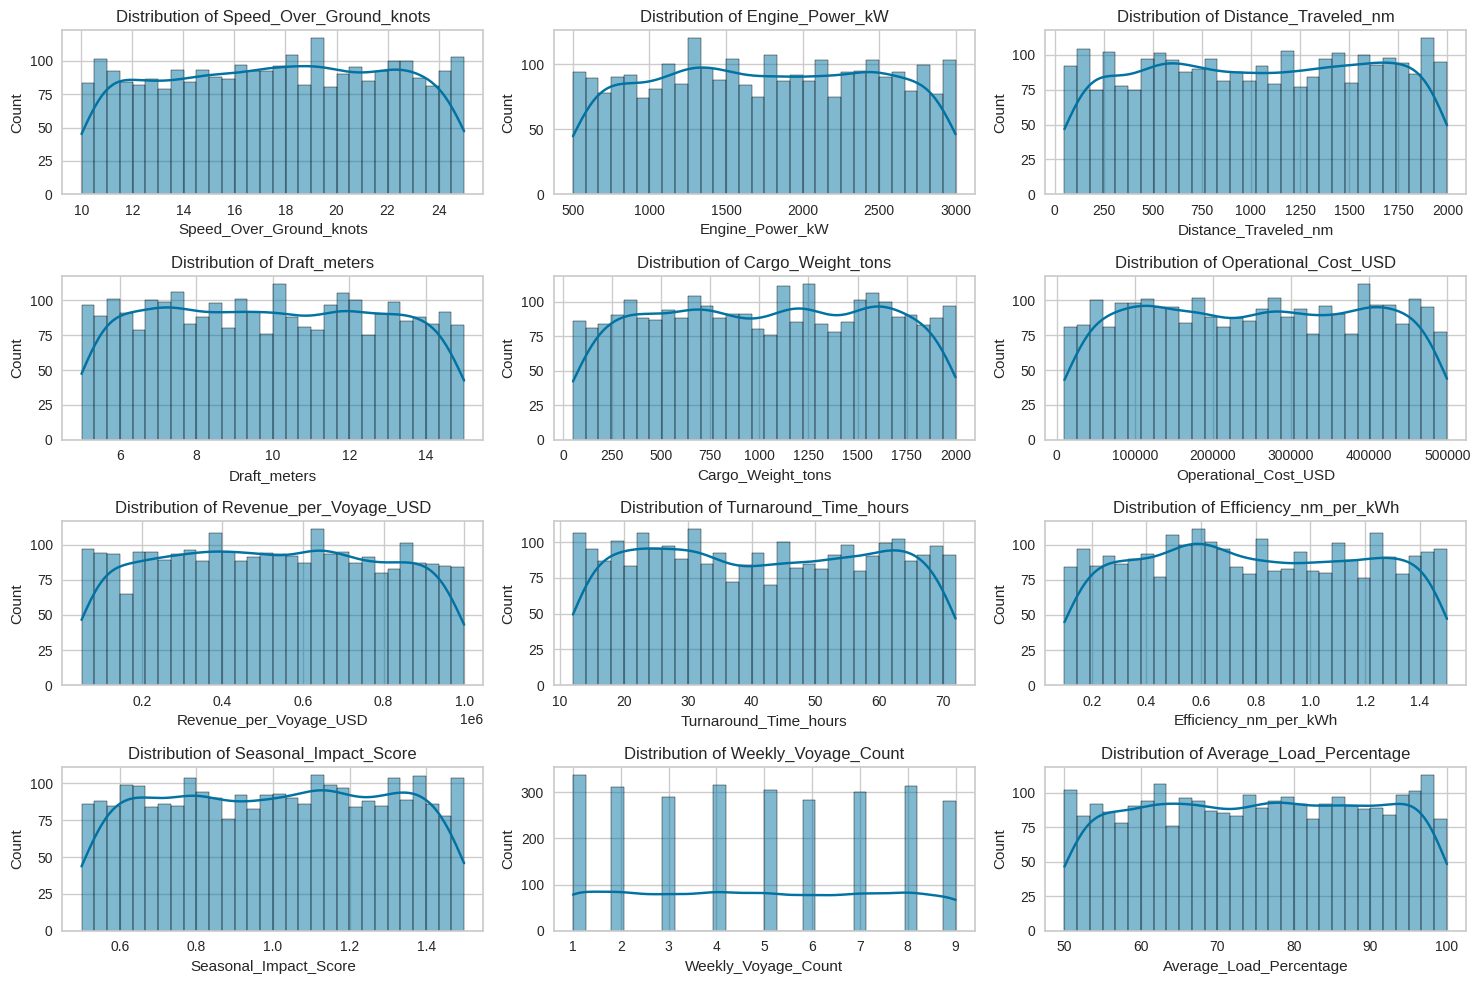

In [ ]:
#visualisasi variabel numerik dengan histogram
numeric_features = nel.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(nel[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

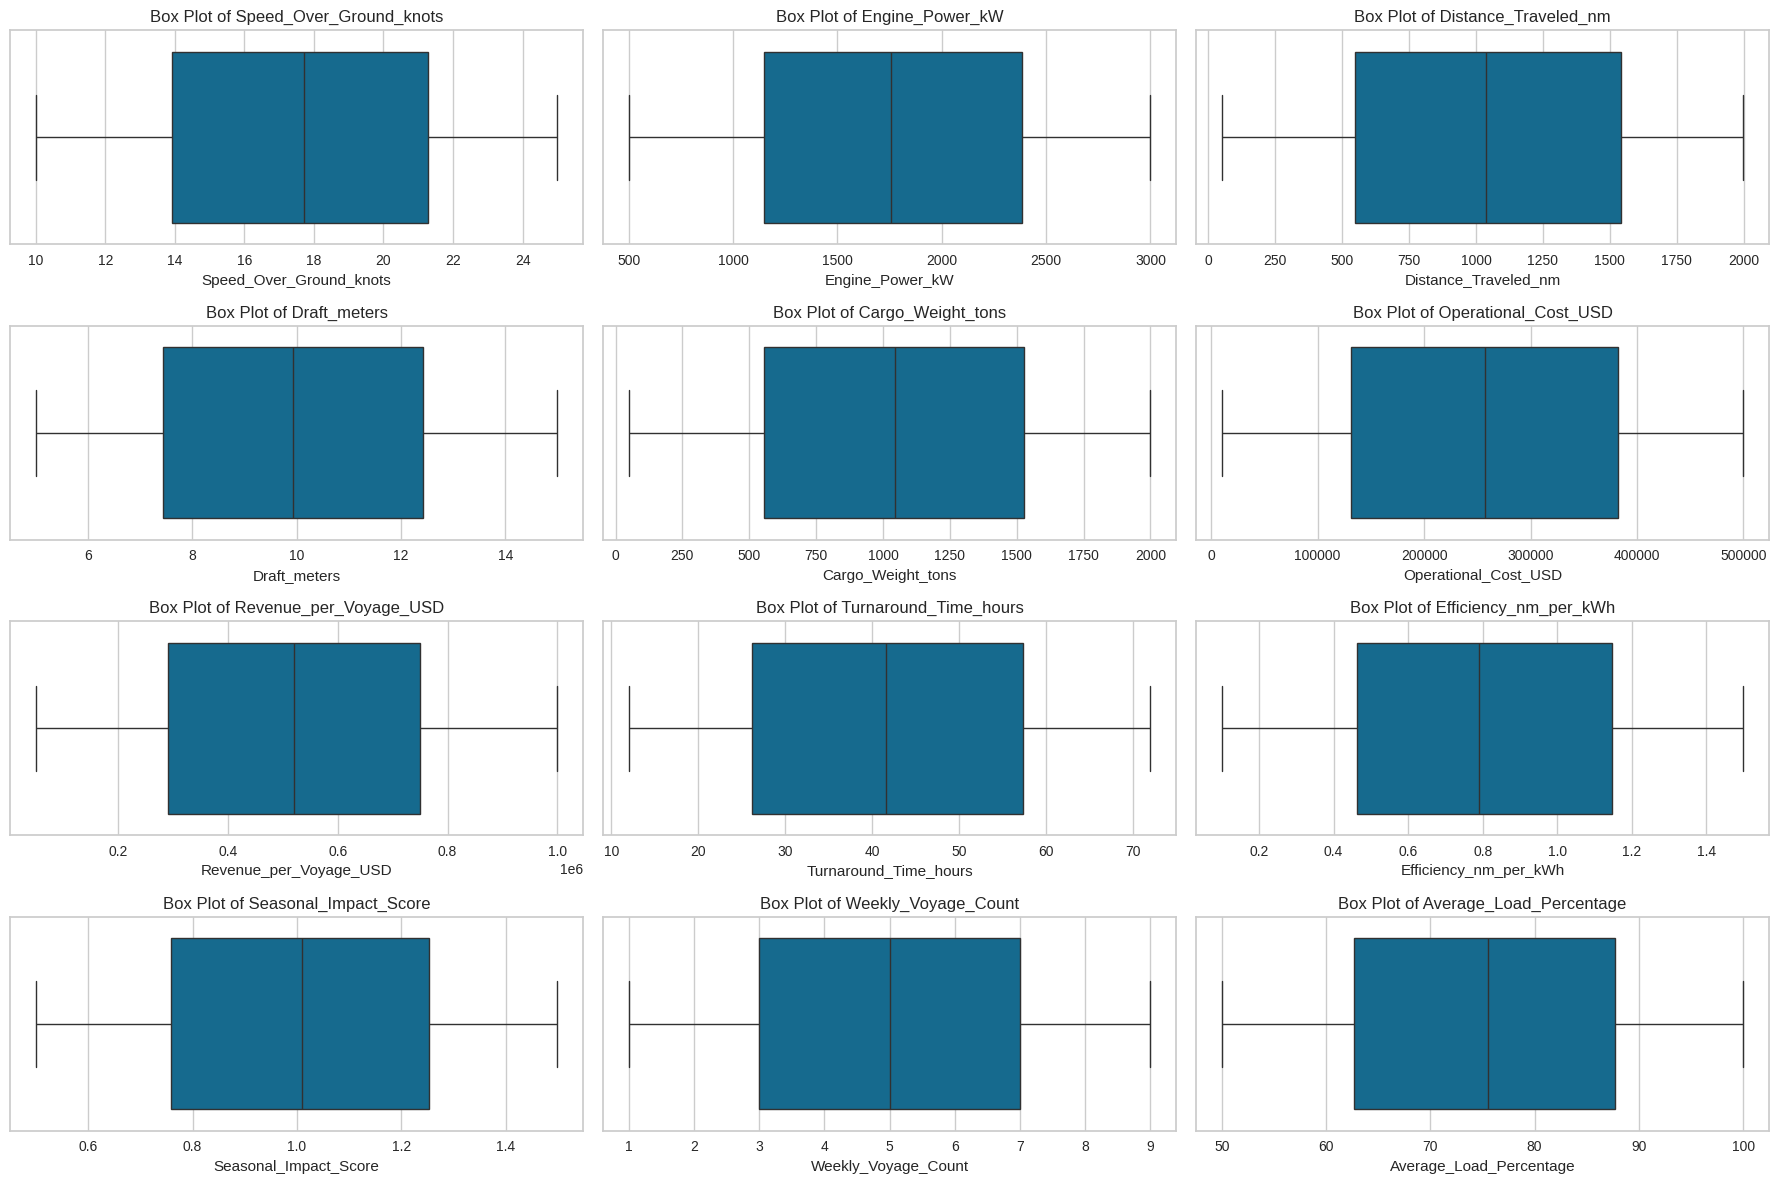

In [ ]:
#visualisasi variabel numerik dengan boxplot.
plt.figure(figsize=(18, 12))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=nel[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


dari 12 grafik dengan tipe data numerik diperoleh informasi bahwa dataset tersebut tidak mengalami outlier

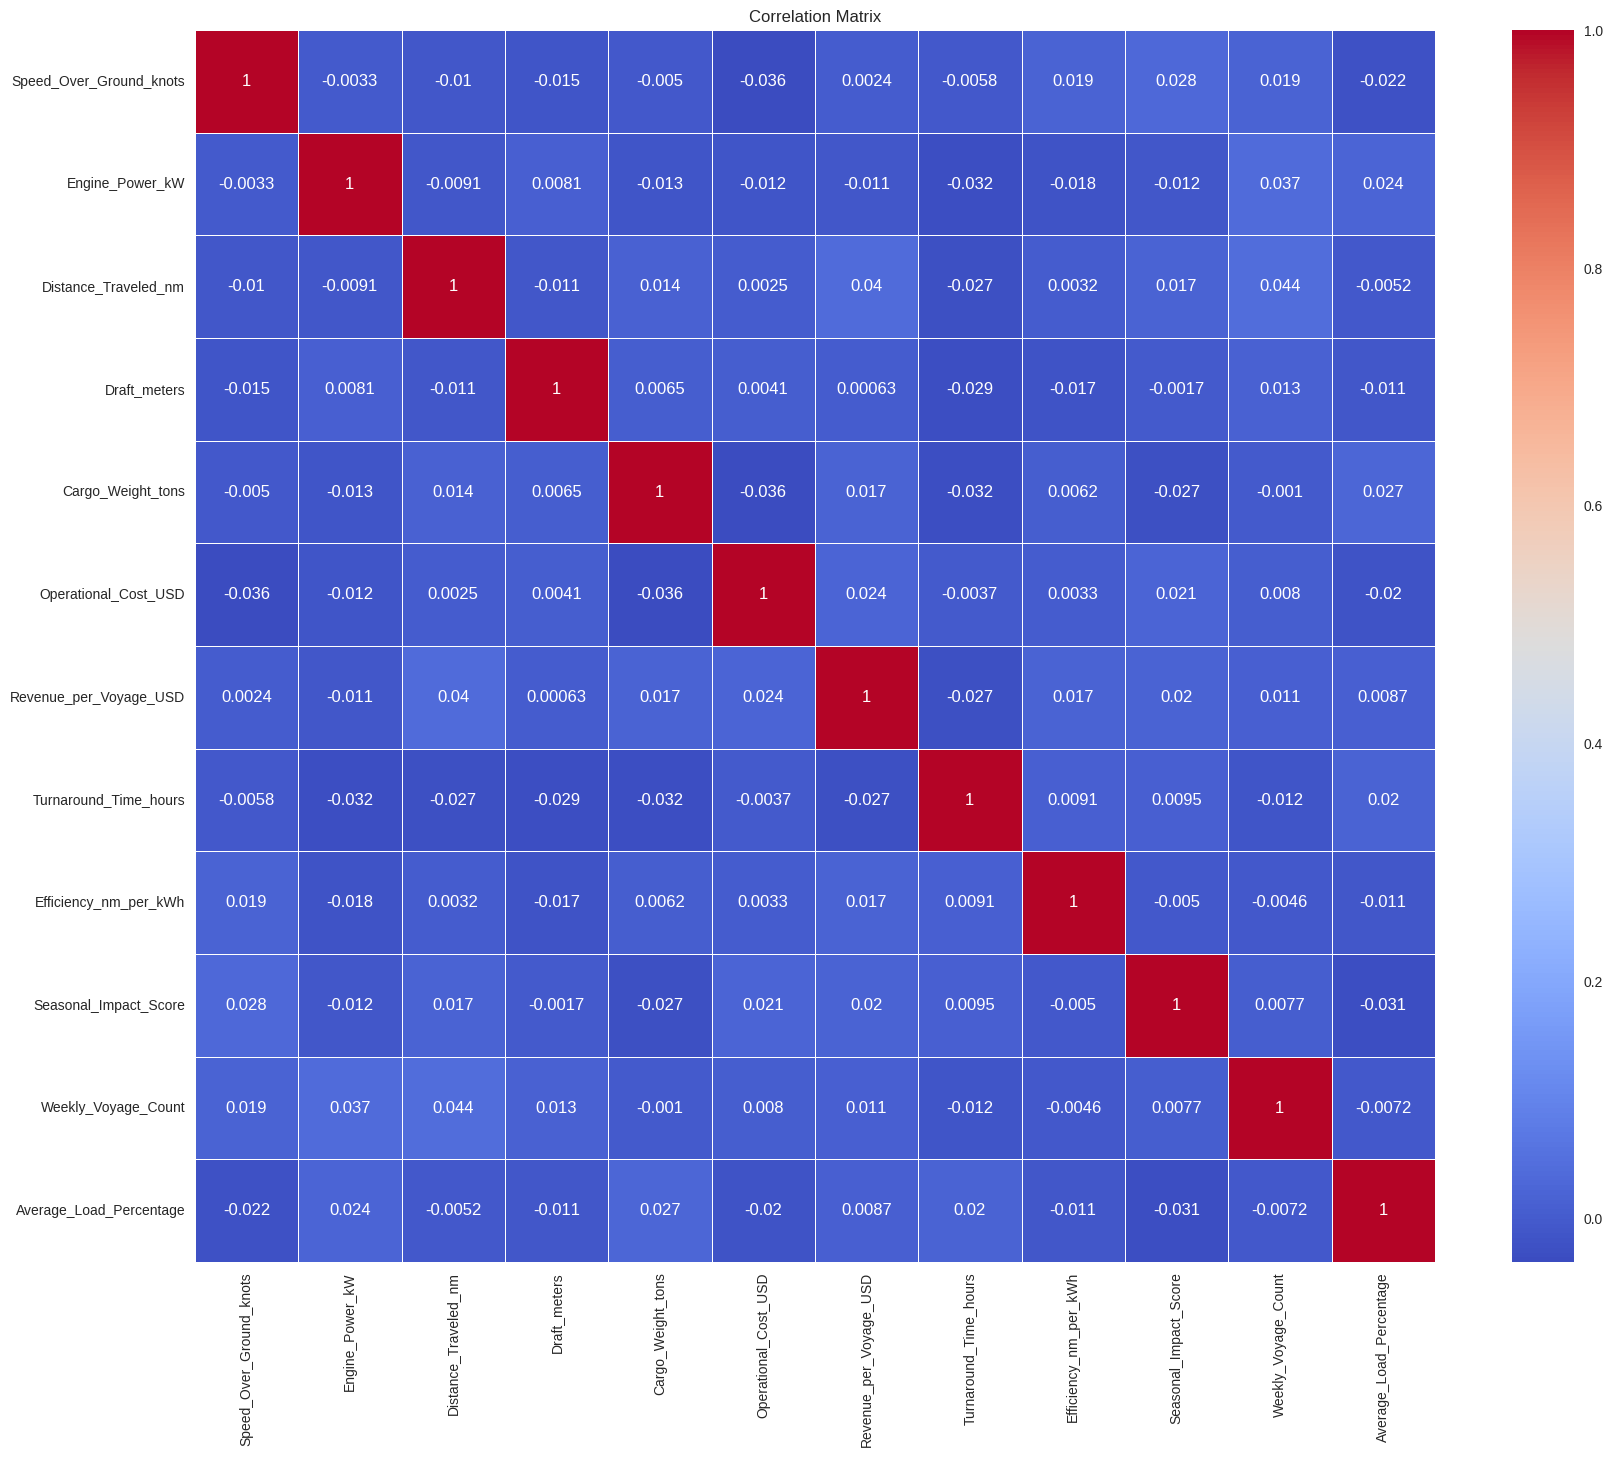

In [ ]:
#akan ditampilkan matriks korelasi dengan heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(nel[numeric_features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Menampilkan deskripsi statistik untuk fitur kategorikal
categorical_features = nel.select_dtypes(include=['object']).columns.tolist()
categorical_info = nel[categorical_features].describe().T
categorical_info

,count,unique,top,freq
Ship_Type,2600,4,Bulk Carrier,669
Route_Type,2600,4,Long-haul,686
Engine_Type,2600,3,Diesel,892
Maintenance_Status,2600,3,Good,873
Weather_Condition,2600,3,Calm,893


<ipython-input-13-bf9cccac5df8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=nel[column], order=nel[column].value_counts().index, palette="viridis")
<ipython-input-13-bf9cccac5df8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=nel[column], order=nel[column].value_counts().index, palette="viridis")
<ipython-input-13-bf9cccac5df8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=nel[column], order=nel[column].value_counts().index, palette="viridis")
<ipython-input-13-bf9cccac5df8>:8: FutureWarning: 

Passing `palette` withou

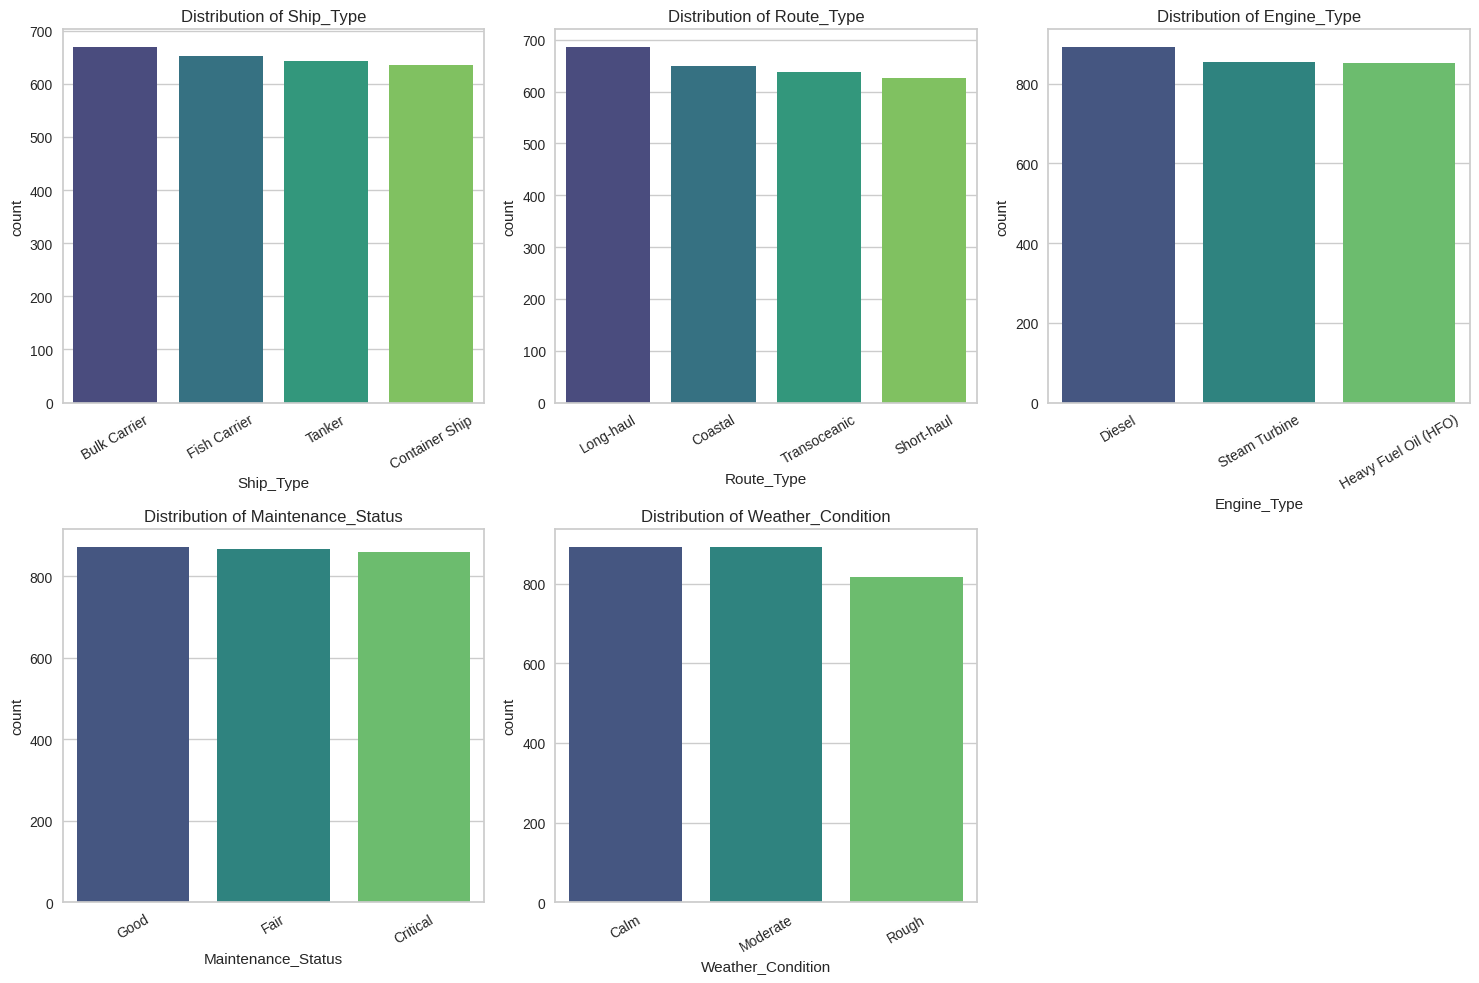

In [ ]:
#visualisasi variabel kategorikal dengan histogram
categorical_features = nel.select_dtypes(include=['object']).columns.tolist()

plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=nel[column], order=nel[column].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
#Menangani Data Kosong (Missing Values) dengan nilai Modus
for column in nel.columns:
    nel[column].fillna(nel[column].mode()[0], inplace=True)


<ipython-input-14-8dcd37845a40>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nel[column].fillna(nel[column].mode()[0], inplace=True)
<ipython-input-14-8dcd37845a40>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
# Mengecek apakah masih ada missing values
print(nel.isnull().sum())

Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


In [ ]:
# Mengecek jumlah data duplikat
nel_duplikat= nel.duplicated().sum()
print(f"Jumlah data duplikat: {nel_duplikat}")


Jumlah data duplikat: 0


In [ ]:
#Mendeteksi apakah kolom numerik mengalami outlier
numeric_features = nel.select_dtypes(include=['number']).columns.tolist()
outliers = {}
for col in numeric_features:
    Q1 = nel[col].quantile(0.25)
    Q3 = nel[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = ((nel[col] < lower_bound) | (nel[col] > upper_bound)).sum()
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Speed_Over_Ground_knots: 0 outliers
Engine_Power_kW: 0 outliers
Distance_Traveled_nm: 0 outliers
Draft_meters: 0 outliers
Cargo_Weight_tons: 0 outliers
Operational_Cost_USD: 0 outliers
Revenue_per_Voyage_USD: 0 outliers
Turnaround_Time_hours: 0 outliers
Efficiency_nm_per_kWh: 0 outliers
Seasonal_Impact_Score: 0 outliers
Weekly_Voyage_Count: 0 outliers
Average_Load_Percentage: 0 outliers


In [ ]:
#mengencode tipe data kategorikal pada kolom 'Ship_Type', 'Engine_Type', 'Route_Type'
nel_encode = pd.get_dummies(nel, columns=['Ship_Type', 'Engine_Type', 'Route_Type'])
nel_encode = nel_encode.replace({True:1, False:0})
nel_encode

<ipython-input-18-537537f33ce3>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nel_encode = nel_encode.replace({True:1, False:0})


,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,...,1,0,0,0,1,0,0,1,0,0
1,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,...,0,1,0,0,0,1,0,0,1,0
2,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,...,1,0,0,1,0,0,0,1,0,0
3,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,...,0,0,0,0,0,1,0,0,0,1
4,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,...,0,0,1,0,1,0,0,0,1,0
2732,Good,13.852798,2161.282358,831.355653,14.612775,Calm,218.309002,21029.021721,374365.370930,64.325916,...,0,0,0,0,1,0,0,0,1,0
2733,Critical,16.813713,1343.608006,1376.460622,9.306518,Calm,1630.646419,78883.312529,234120.365052,53.551090,...,1,0,0,0,0,1,0,0,1,0
2734,Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
#mengencode tipe data kategorikal pada kolom 'Weather_Condition', 'Maintenance_Status'
label_encoder = LabelEncoder()
feature_ordinal = ['Weather_Condition', 'Maintenance_Status']

for feature in feature_ordinal:
  nel_encode[feature] = label_encoder.fit_transform(nel_encode[feature])

nel_encode

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,0,12.597558,2062.983982,1030.943616,14.132284,1,1959.017882,483832.354540,292183.273104,25.867077,...,1,0,0,0,1,0,0,1,0,0
1,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,...,0,1,0,0,0,1,0,0,1,0
2,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,...,1,0,0,1,0,0,0,1,0,0
3,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,...,0,0,0,0,0,1,0,0,0,1
4,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,2,11.607997,2918.395972,239.990359,13.700906,1,318.111891,237975.067292,731584.322921,47.152337,...,0,0,1,0,1,0,0,0,1,0
2732,2,13.852798,2161.282358,831.355653,14.612775,0,218.309002,21029.021721,374365.370930,64.325916,...,0,0,0,0,1,0,0,0,1,0
2733,0,16.813713,1343.608006,1376.460622,9.306518,0,1630.646419,78883.312529,234120.365052,53.551090,...,1,0,0,0,0,1,0,0,1,0
2734,2,23.132643,2028.143572,619.236340,6.623856,1,153.441965,25241.550250,799713.737211,14.335517,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
num_encode = nel_encode.select_dtypes(include=['number']).columns
num_encode

Index(['Maintenance_Status', 'Speed_Over_Ground_knots', 'Engine_Power_kW',
       'Distance_Traveled_nm', 'Draft_meters', 'Weather_Condition',
       'Cargo_Weight_tons', 'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage', 'Ship_Type_Bulk Carrier',
       'Ship_Type_Container Ship', 'Ship_Type_Fish Carrier',
       'Ship_Type_Tanker', 'Engine_Type_Diesel',
       'Engine_Type_Heavy Fuel Oil (HFO)', 'Engine_Type_Steam Turbine',
       'Route_Type_Coastal', 'Route_Type_Long-haul', 'Route_Type_Short-haul',
       'Route_Type_Transoceanic'],
      dtype='object')

In [ ]:
#Menormalisasi data
minmax_scale = MinMaxScaler()
nel_encode[num_encode] = minmax_scale.fit_transform(nel_encode[num_encode])
nel_encode

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,...,Ship_Type_Container Ship,Ship_Type_Fish Carrier,Ship_Type_Tanker,Engine_Type_Diesel,Engine_Type_Heavy Fuel Oil (HFO),Engine_Type_Steam Turbine,Route_Type_Coastal,Route_Type_Long-haul,Route_Type_Short-haul,Route_Type_Transoceanic
0,0.0,0.172666,0.625357,0.503367,0.913856,0.5,0.979420,0.967522,0.254676,0.230969,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.025210,0.518488,0.518533,0.965983,1.0,0.057553,0.966615,0.877680,0.854481,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.5,0.716607,0.459434,0.312357,0.219929,0.5,0.065581,0.895451,0.361920,0.623798,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.736981,0.165847,0.552589,0.679323,0.5,0.865698,0.513144,0.039175,0.173291,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.5,0.249079,0.235695,0.716076,0.473014,0.5,0.107941,0.566997,0.659007,0.869660,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,1.0,0.106640,0.967835,0.097313,0.870679,0.5,0.137453,0.465406,0.717415,0.586004,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2732,1.0,0.256420,0.664712,0.400904,0.961948,0.0,0.086243,0.022336,0.341223,0.872457,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2733,0.0,0.453982,0.337342,0.680746,0.430845,0.0,0.810929,0.140492,0.193529,0.692735,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2734,1.0,0.875601,0.611408,0.292008,0.162337,0.5,0.052959,0.030939,0.789163,0.038624,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

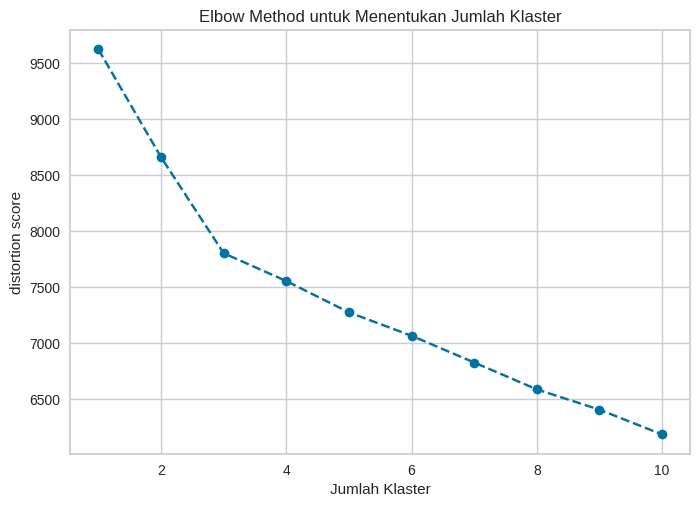

In [ ]:
# Menggunakan Elbow Method untuk menentukan jumlah klaster yang akan digunakan
X = nel_encode
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Klaster')
plt.ylabel('distortion score')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster')
plt.show()


Berdasarkan visualisasi diatas nilai k yang kemungkinan dipakai agar hasil optimal adalah ketika k=3 karena titik letak penurunan SSE mulai melambat secara signifikan saat k=3, untuk memverifikasi lebih lanjut bisa menggunakan visualisasi dibawah ini.

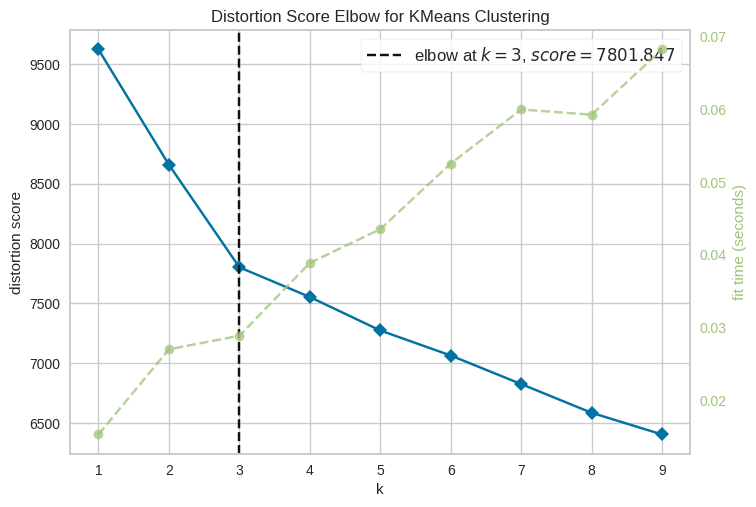

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Memastikan nilai k=3
kmeans = KMeans(n_init=10, random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1, 10), timings=True)
visualizer.fit(nel_encode)
visualizer.show()


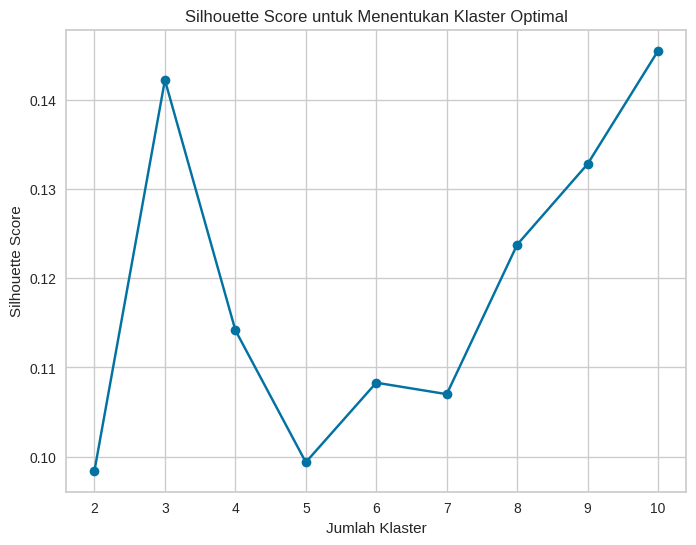

In [ ]:
# Menampilkan visualisasi Silhoutte Score
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = kmeans.fit_predict(nel_encode)  # Menggunakan dataset 'nel'
    silhouette_scores.append(silhouette_score(nel_encode, labels))
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Klaster Optimal')
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Menghitung Silhoutte Score dengan k yang sudah ditentukan
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
labels = kmeans.fit_predict(nel_encode)
silhouette_avg = silhouette_score(nel_encode, labels)
print(f"Silhouette Score untuk k = {optimal_k}: {silhouette_avg:.4f}")


Silhouette Score untuk k = 3: 0.1422


Dengan Silhouette Score = 0.1422, hasil clustering menunjukkan bahwa:
* Nilai mendekati 0 yang berarti itik berada di perbatasan antara dua klaster, menunjukkan overlap antar klaster.
* Klaster yang terbentuk kurang terpisah dengan baik dan mungkin terjadi overlap antara beberapa kelompok.
Bisa membuang kolom yang memiliki variansi terendah agar ketika di feature selection nilai Silhouette Score bisa meningkat.  







In [ ]:
#menghitung fitur PCA
pca = PCA(n_components=2)
nel_pca = pca.fit_transform(nel_encode)  # Transform data

print(f"Jumlah fitur setelah PCA: {nel_pca.shape[1]}")


Jumlah fitur setelah PCA: 2


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#mengahapus kolom berdasarkan nilai variansi terendah untuk melakukan proses feature selection agar Silhouette Score meningkat
columns_to_drop = ['Efficiency_nm_per_kWh', 'Seasonal_Impact_Score']
df_selection = nel_encode.drop(columns=columns_to_drop)
pca = PCA(n_components=2)
df_selection_pca = pca.fit_transform(df_selection)
print(f"Shape sebelum PCA: {df_selection.shape}")
print(f"Shape setelah PCA: {df_selection_pca.shape}")

Shape sebelum PCA: (2736, 23)
Shape setelah PCA: (2736, 2)


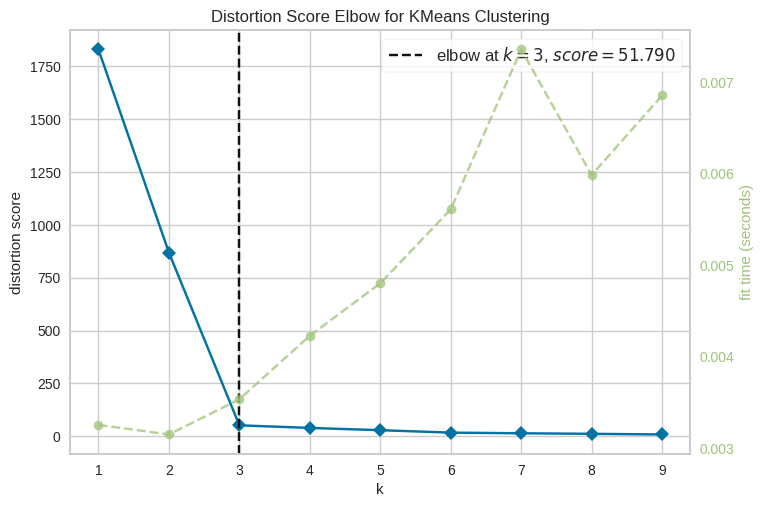

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#menampilkan visualisasi Score Elbow untuk menentukan nilai k
kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_selection_pca)
visualizer.show()


In [ ]:
#menampilkan Silhoutte Score ketika k = 3
optimal_k = 3
kmeans_df_selection_pca = KMeans(n_clusters=optimal_k, random_state=0).fit(df_selection_pca)

silhouette_df_selection_pca = silhouette_score(df_selection_pca, kmeans_df_selection_pca.labels_)
print(f'Silhouette Score for df_selection_pca (k={optimal_k}): {silhouette_df_selection_pca:.4f}')


Silhouette Score for df_selection_pca (k=3): 0.8805


Berdasarkan hasil setelah feature selection diperoleh Silhouette Score sebesar 0.8805, dimana perbandingan yang kita peroleh yaitu :
*   Silhouette Score sebelum feature selection : 0.1422
*   Silhouette Score sebelum feature selection : 0.8805






Hal tersebut menunjukkan bahwa feature selection membantu meningkatkan Silhouette Score dimana ukuran dimensi juga berpengaruh sehingga membuat kolom dengan variansi terendah dapat menjadi salah satu solusi.


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

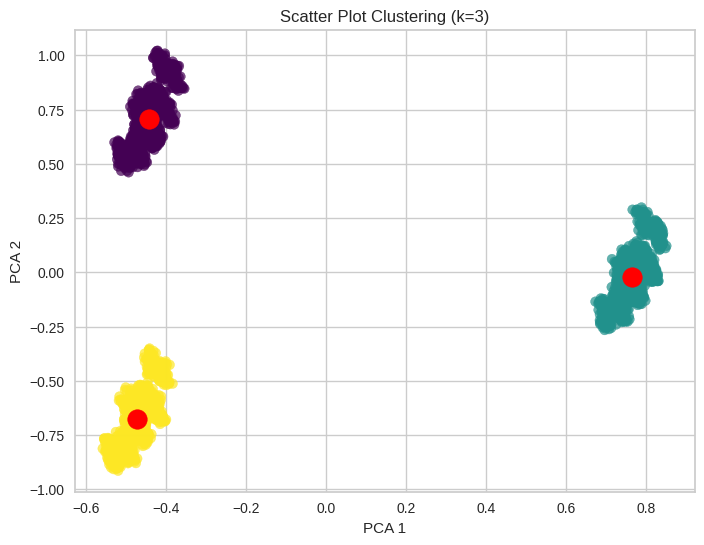

In [ ]:
# Scatter plot hasil clustering berdasarkan PCA 2D
plt.figure(figsize=(8, 6))
plt.scatter(df_selection_pca[:, 0], df_selection_pca[:, 1], c=kmeans_df_selection_pca.labels_, cmap='viridis', alpha=0.7)
plt.scatter(kmeans_df_selection_pca.cluster_centers_[:, 0], kmeans_df_selection_pca.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot Clustering (k=3)')

plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
# Menambahkan label cluster hasil K-Means ke dataset awal
nel['Cluster'] = kmeans_df_selection_pca.labels_
nel.drop(columns=['Efficiency_nm_per_kWh', 'Seasonal_Impact_Score'], inplace=True)
nel


,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Weekly_Voyage_Count,Average_Load_Percentage,Cluster
0,Container Ship,Long-haul,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1,93.769249,0
1,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,6,93.895372,2
2,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,9,96.218244,1
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,1,66.193698,2
4,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,8,80.008581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,11.607997,2918.395972,239.990359,13.700906,Moderate,318.111891,237975.067292,731584.322921,47.152337,3,74.813114,0
2732,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,Calm,218.309002,21029.021721,374365.370930,64.325916,2,84.595155,0
2733,Container Ship,Short-haul,Steam Turbine,Critical,16.813713,1343.608006,1376.460622,9.306518,Calm,1630.646419,78883.312529,234120.365052,53.551090,6,80.975269,2
2734,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,23.132643,2028.143572,619.236340,6.623856,Moderate,153.441965,25241.550250,799713.737211,14.335517,2,92.853622,0


In [ ]:
nel['Cluster'] = nel['Cluster'].astype(str)

# Pisahkan kolom numerik dan kategori
numerical_cols = nel.select_dtypes(include=['number']).columns.tolist()
categorical_cols = nel.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_summary = nel.groupby('Cluster')[numerical_cols].mean()
categorical_summary = nel.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0])

final_summary = pd.concat([numerical_summary.T, categorical_summary.T], axis=0)

pd.options.display.float_format = '{:.4f}'.format
print(final_summary)


Cluster                                     0             1              2
Speed_Over_Ground_knots               17.7281       17.5634        17.5254
Engine_Power_kW                     1776.5469     1748.8948      1749.1990
Distance_Traveled_nm                1040.6340     1030.8781      1038.8350
Draft_meters                           9.9424        9.8714         9.9852
Cargo_Weight_tons                    998.5258     1046.3949      1049.9228
Operational_Cost_USD              258134.5047   253254.8298    254429.8163
Revenue_per_Voyage_USD            516628.9701   521487.6509    525933.0819
Turnaround_Time_hours                 41.3375       41.6979        42.2163
Weekly_Voyage_Count                    4.8499        4.9669         4.9170
Average_Load_Percentage               74.5786       75.4517        75.5788
Ship_Type                        Bulk Carrier  Bulk Carrier   Bulk Carrier
Route_Type                          Long-haul     Long-haul      Long-haul
Engine_Type              

KLASTERISASI KAPAL
1. Cluster 0: (Heavy Fuel Oil, Critical Maintenance)
* Rata-rata Speed Over Ground (knots): 17.7281
* Rata-rata Engine Power (kW): 1776.5469
* Rata-rata Distance Traveled (nm): 1040.6340
* Rata-rata Draft (meters): 9.9424
* Rata-rata Cargo Weight (tons): 998.5258
* Rata-rata Operational Cost (USD): 258,134.50
* Rata-rata Revenue per Voyage (USD): 516,628.97
* Rata-rata Turnaround Time (hours): 41.3375
* Rata-rata Weekly Voyage Count: 4.8499
* Rata-rata Average Load Percentage: 74.5786%
* Tipe Kapal Dominan: Bulk Carrier
* Rute Dominan: Long-haul
* Tipe Mesin Dominan: Heavy Fuel Oil (HFO)
* Status Pemeliharaan: Critical
* Kondisi Cuaca Dominan: Calm
* **Analisis:** Cluster ini terdiri dari kapal Bulk Carrier yang menggunakan Heavy Fuel Oil (HFO) sebagai bahan bakarnya. Dengan status pemeliharaan yang kritis, kapal-kapal dalam cluster ini mungkin membutuhkan perawatan lebih lanjut untuk menjaga performa optimal. Rata-rata biaya operasionalnya adalah yang tertinggi dibandingkan cluster lain, kemungkinan karena efisiensi bahan bakar yang lebih rendah atau kebutuhan pemeliharaan tambahan. Walaupun begitu, rata-rata pendapatan per perjalanan masih cukup tinggi.


2. Cluster 1: (Diesel, Calm Maintenance)
* Rata-rata Speed Over Ground (knots): 17.5634
* Rata-rata Engine Power (kW): 1748.8948
* Rata-rata Distance Traveled (nm): 1030.8781
* Rata-rata Draft (meters): 9.8714
* Rata-rata Cargo Weight (tons): 1046.3949
* Rata-rata Operational Cost (USD): 253,254.83
* Rata-rata Revenue per Voyage (USD): 521,487.65
* Rata-rata Turnaround Time (hours): 41.6979
* Rata-rata Weekly Voyage Count: 4.9669
* Rata-rata Average Load Percentage: 75.4517%
* Tipe Kapal Dominan: Bulk Carrier
* Rute Dominan: Long-haul
* Tipe Mesin Dominan: Diesel
* Status Pemeliharaan: Good
* Kondisi Cuaca Dominan: Calm
* **Analisis:** Cluster ini menunjukkan kapal Bulk Carrier yang menggunakan mesin Diesel, yang cenderung lebih efisien dibandingkan dengan HFO di cluster sebelumnya. Status pemeliharaan yang baik (Good) mengindikasikan bahwa kapal dalam kelompok ini dalam kondisi yang lebih layak dibandingkan cluster 0. Dengan biaya operasional yang lebih rendah dan pendapatan per perjalanan yang lebih tinggi, cluster ini mungkin merupakan kategori kapal dengan efisiensi terbaik dalam operasionalnya.


3. Cluster 2: (Steam Turbine, Calm Maintenance)
* Rata-rata Speed Over Ground (knots): 17.5254
* Rata-rata Engine Power (kW): 1749.1990
* Rata-rata Distance Traveled (nm): 1038.8350
* Rata-rata Draft (meters): 9.9852
* Rata-rata Cargo Weight (tons): 1049.9228
* Rata-rata Operational Cost (USD): 254,429.82
* Rata-rata Revenue per Voyage (USD): 525,933.08
* Rata-rata Turnaround Time (hours): 42.2163
* Rata-rata Weekly Voyage Count: 4.9170
* Rata-rata Average Load Percentage: 75.5788%
* Tipe Kapal Dominan: Bulk Carrier
* Rute Dominan: Long-haul
* Tipe Mesin Dominan: Steam Turbine
* Status Pemeliharaan: Good
* Kondisi Cuaca Dominan: Calm
* **Analisis:** Cluster ini mencakup kapal Bulk Carrier dengan Steam Turbine, yang merupakan jenis mesin yang lebih jarang digunakan dibandingkan Diesel atau HFO. Mesin ini memiliki efisiensi tertentu dalam operasionalnya, terlihat dari biaya operasional yang berada di antara cluster 0 dan 1, serta pendapatan tertinggi per perjalanan. Dengan status pemeliharaan yang baik (Good), kapal-kapal dalam cluster ini memiliki potensi operasional yang lebih stabil dalam jangka panjang.

**Kesimpulan:**  
* Cluster 0 (HFO, Status Kritis) memiliki biaya operasional tertinggi, dengan kebutuhan pemeliharaan yang mendesak.
* Cluster 1 (Diesel, Status Baik) merupakan kelompok paling efisien dalam operasional, dengan pendapatan yang cukup tinggi dan biaya operasional lebih rendah.
* Cluster 2 (Steam Turbine, Status Baik) memiliki pendapatan tertinggi, dengan efisiensi mesin yang cukup baik dibanding cluster lainnya.

Dari hasil ini, dapat disarankan bahwa
Kapal dalam Cluster 0 perlu peningkatan pemeliharaan agar lebih efisien.
Cluster 1 dapat dijadikan sebagai referensi untuk meningkatkan efisiensi armada.
Cluster 2 menunjukkan potensi dalam teknologi Steam Turbine, yang mungkin dapat dikembangkan lebih lanjut.




# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan dataset ke CSV
nel.to_csv("Dataset_clustering.csv", index=False)
